In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define the column name
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']

df = pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\iml\adult.data', names=column_names)

# Ensure the column names are correctly set
df.columns = column_names


In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
print(df)

       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [9]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_normalize = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [11]:
print(df)

            age  workclass    fnlwgt  education  education-num  \
0      0.301370          7  0.044302          9       0.800000   
1      0.452055          6  0.048238          9       0.800000   
2      0.287671          4  0.138113         11       0.533333   
3      0.493151          4  0.151068          1       0.400000   
4      0.150685          4  0.221488          9       0.800000   
...         ...        ...       ...        ...            ...   
32556  0.136986          4  0.166404          7       0.733333   
32557  0.315068          4  0.096500         11       0.533333   
32558  0.561644          4  0.094827         11       0.533333   
32559  0.068493          4  0.128499         11       0.533333   
32560  0.479452          5  0.187203         11       0.533333   

       marital-status  occupation  relationship  race  sex  capital-gain  \
0                   4           1             1     4    1      0.021740   
1                   2           4             0     4  

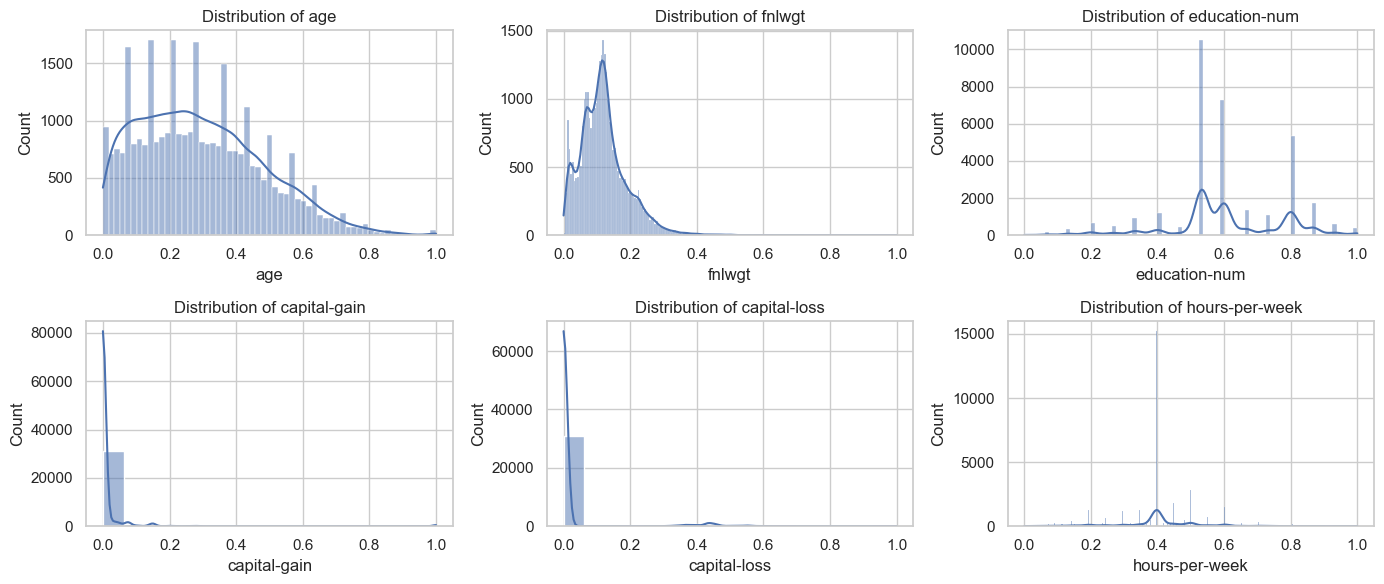

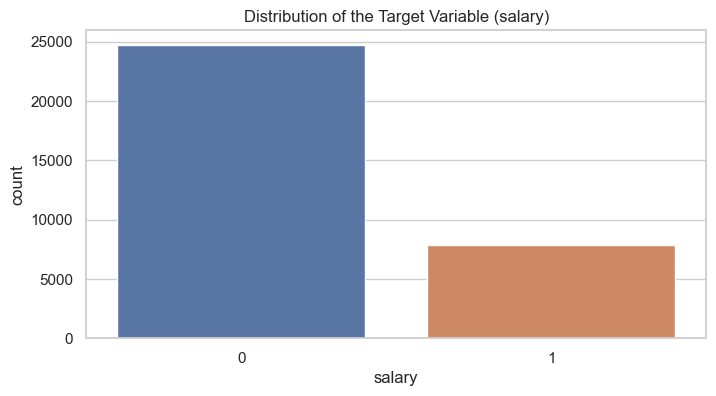

In [12]:
#histogram plot
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = df.select_dtypes(include=['int64', 'float64'])
num_cols = numerical_features.shape[1]  # Number of numerical columns
num_rows = (num_cols // 3) + (num_cols % 3)  # Calculate the number of rows needed

sns.set(style="whitegrid")
plt.figure(figsize=(14, 3 * num_rows))  

for i, col in enumerate(numerical_features.columns):
    plt.subplot(num_rows, 3, i + 1)  
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='salary')
plt.title('Distribution of the Target Variable (salary)')
plt.show()

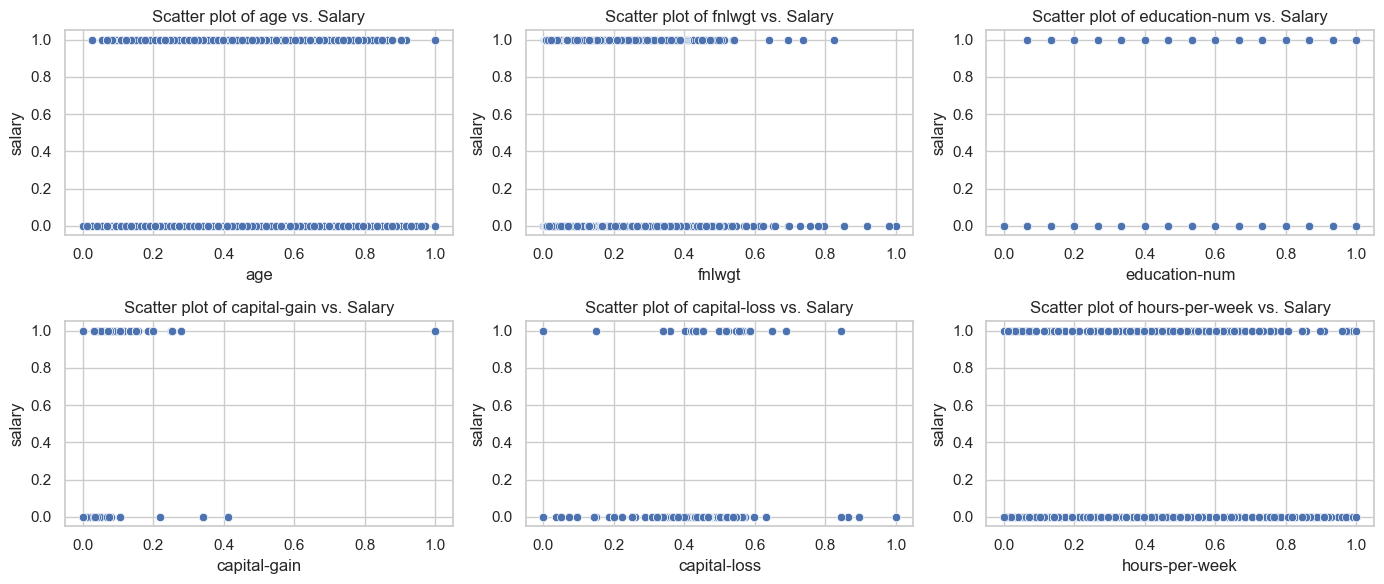

In [13]:
#scatter plot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 3 * num_rows))

for i, col in enumerate(numerical_features.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.scatterplot(data=df, x=col, y='salary')
    plt.title(f'Scatter plot of {col} vs. Salary')

plt.tight_layout()
plt.show()

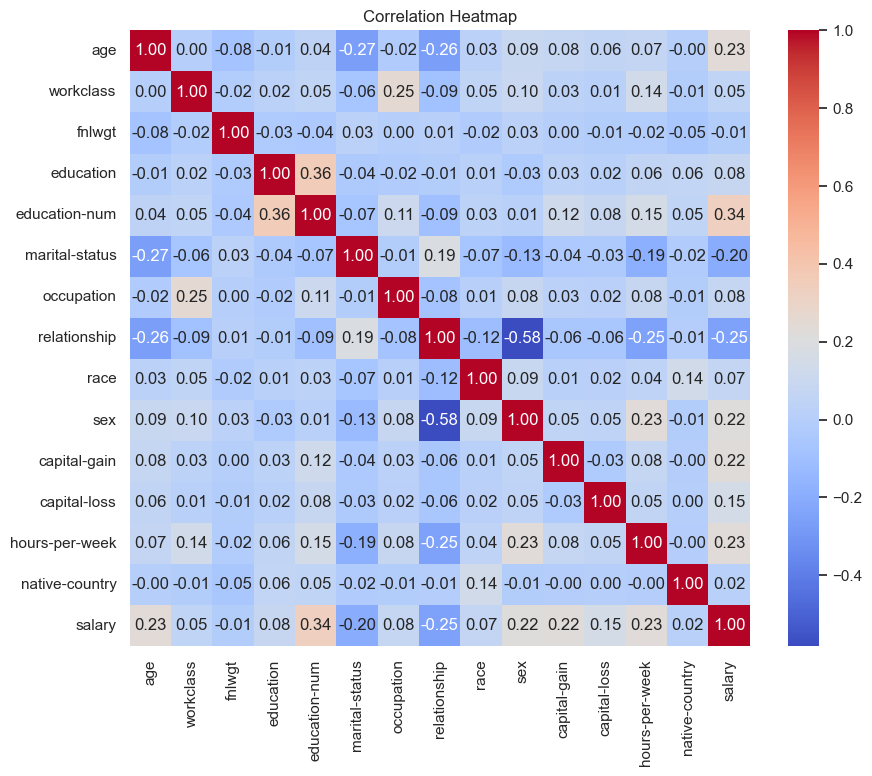

In [14]:
corr_matrix = df.corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
X = df.drop(columns=['salary'])
y = df['salary']

In [16]:
#df1 is our test dataset
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']

df1 = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\iml\adult.test", names=column_names)

df1.columns = column_names


In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']

for column in categorical_columns:
    df1[column] = label_encoder.fit_transform(df1[column])


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             16281 non-null  int64
 1   workclass       16281 non-null  int32
 2   fnlwgt          16281 non-null  int64
 3   education       16281 non-null  int32
 4   education-num   16281 non-null  int64
 5   marital-status  16281 non-null  int32
 6   occupation      16281 non-null  int32
 7   relationship    16281 non-null  int32
 8   race            16281 non-null  int32
 9   sex             16281 non-null  int32
 10  capital-gain    16281 non-null  int64
 11  capital-loss    16281 non-null  int64
 12  hours-per-week  16281 non-null  int64
 13  native-country  16281 non-null  int32
 14  salary          16281 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 1.3 MB


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columns_to_normalize = [ 'age','fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

df1[columns_to_normalize] = scaler.fit_transform(df1[columns_to_normalize])


In [20]:
print(df1)

            age  workclass    fnlwgt  education  education-num  \
0      0.109589          4  0.144430          1       0.400000   
1      0.287671          4  0.051677         11       0.533333   
2      0.150685          2  0.219011          7       0.733333   
3      0.369863          4  0.099418         15       0.600000   
4      0.013699          0  0.060942         15       0.600000   
...         ...        ...       ...        ...            ...   
16276  0.301370          4  0.136723          9       0.800000   
16277  0.643836          0  0.208484         11       0.533333   
16278  0.287671          4  0.244762          9       0.800000   
16279  0.369863          4  0.047666          9       0.800000   
16280  0.246575          5  0.114195          9       0.800000   

       marital-status  occupation  relationship  race  sex  capital-gain  \
0                   4           7             3     2    1      0.000000   
1                   2           5             0     4  

In [21]:
mv_columns = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
df1[mv_columns] = df1[mv_columns].fillna(df1[mv_columns].mode().iloc[0])

In [22]:
df1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.109589,4,0.144430,1,0.400000,4,7,3,2,1,0.000000,0.0,0.397959,38,0
1,0.287671,4,0.051677,11,0.533333,2,5,0,4,1,0.000000,0.0,0.500000,38,0
2,0.150685,2,0.219011,7,0.733333,2,11,0,4,1,0.000000,0.0,0.397959,38,1
3,0.369863,4,0.099418,15,0.600000,2,7,0,2,1,0.076881,0.0,0.397959,38,1
4,0.013699,0,0.060942,15,0.600000,4,0,3,4,0,0.000000,0.0,0.295918,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.301370,4,0.136723,9,0.800000,0,10,1,4,0,0.000000,0.0,0.357143,38,0
16277,0.643836,0,0.208484,11,0.533333,6,0,2,2,1,0.000000,0.0,0.397959,38,0
16278,0.287671,4,0.244762,9,0.800000,2,10,0,4,1,0.000000,0.0,0.500000,38,0
16279,0.369863,4,0.047666,9,0.800000,0,1,3,1,1,0.054551,0.0,0.397959,38,0


In [23]:
X1 = df1.drop(columns=['salary'])
y1 = df1['salary']

In [24]:
!pip install pycaret

In [25]:
from pycaret.classification import *

In [26]:
model_setup = setup(data=df, target='salary', session_id=145)

,Description,Value
0,Session id,145
1,Target,salary
2,Target type,Binary
3,Original data shape,"(32561, 15)"
4,Transformed data shape,"(32561, 15)"
5,Transformed train set shape,"(22792, 15)"
6,Transformed test set shape,"(9769, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [27]:
best_model = compare_models()
print(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8723,0.9262,0.6544,0.7802,0.7117,0.6305,0.6346,0.5800
gbc,Gradient Boosting Classifier,0.8642,0.9200,0.5957,0.7885,0.6786,0.5946,0.6041,1.9620
ada,Ada Boost Classifier,0.8591,0.9129,0.6012,0.7636,0.6725,0.5843,0.5913,0.6940
rf,Random Forest Classifier,0.8568,0.9051,0.6203,0.7428,0.6760,0.5851,0.5890,1.6930
et,Extra Trees Classifier,0.8467,0.8911,0.6145,0.7100,0.6587,0.5606,0.5630,1.3340
lr,Logistic Regression,0.8211,0.8477,0.4307,0.7128,0.5368,0.4342,0.4554,2.0350
knn,K Neighbors Classifier,0.8187,0.8336,0.5558,0.6428,0.5961,0.4800,0.4821,0.3700
lda,Linear Discriminant Analysis,0.8141,0.8373,0.3986,0.7002,0.5078,0.4037,0.4282,0.0620
dt,Decision Tree Classifier,0.8130,0.7488,0.6251,0.6091,0.6169,0.4933,0.4934,0.1350
ridge,Ridge Classifier,0.8084,0.0000,0.3166,0.7380,0.4430,0.3489,0.3946,0.0550


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=145, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [28]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [29]:
# SVM classifier
clf = SVC(kernel='rbf')
clf.fit(X, y)

# predictions
y_pred = clf.predict(X1)

# Evaluate the model
accuracy = accuracy_score(y1, y_pred)
report = classification_report(y1, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)


Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     12435
           1       0.00      0.00      0.00      3846

    accuracy                           0.76     16281
   macro avg       0.38      0.50      0.43     16281
weighted avg       0.58      0.76      0.66     16281



In [30]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X, y)

# predictions
y_pred_LR = LR.predict(X1)

# Evaluate the model
accuracy_LR = accuracy_score(y1, y_pred_LR)
report_LR = classification_report(y1, y_pred_LR)

print(f"Accuracy: {accuracy_LR:.2f}")
print(report_LR)

Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     12435
           1       0.66      0.43      0.52      3846

    accuracy                           0.81     16281
   macro avg       0.75      0.68      0.70     16281
weighted avg       0.80      0.81      0.80     16281



In [32]:
#knn classifier
from sklearn.neighbors import KNeighborsClassifier



k = 3 
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X, y)

# Make predictions 
y_pred = knn_model.predict(X1)

# Evaluate the model
accuracy = accuracy_score(y1, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:\n', classification_report(y1, y_pred))

Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88     12435
           1       0.61      0.55      0.58      3846

    accuracy                           0.81     16281
   macro avg       0.74      0.72      0.73     16281
weighted avg       0.81      0.81      0.81     16281



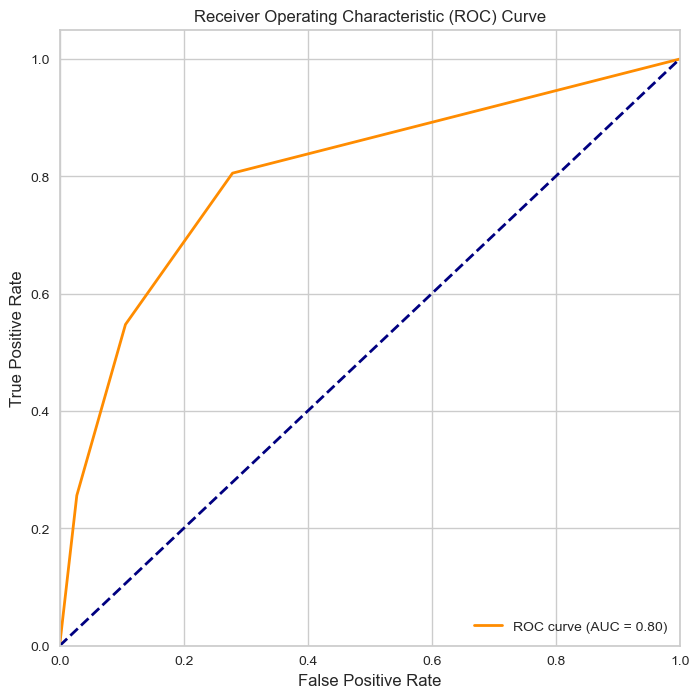

In [33]:
from sklearn.metrics import roc_curve, auc

# ROC curve
fpr, tpr, thresholds = roc_curve(y1, knn_model.predict_proba(X1)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


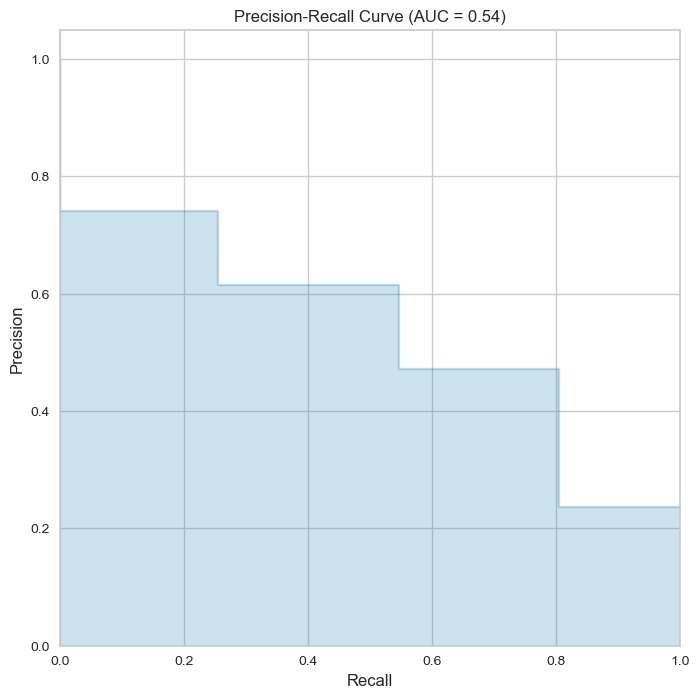

In [34]:
from sklearn.metrics import precision_recall_curve, average_precision_score
#reshape
y_proba = knn_model.predict_proba(X1)[:, 1].reshape(-1, 1)

# precision-recall curve
precision, recall, _ = precision_recall_curve(y1, y_proba, pos_label=1)
average_precision = average_precision_score(y1, y_proba, pos_label=1)

plt.figure(figsize=(8, 8))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AUC = {:.2f})'.format(average_precision))
plt.show()

In [35]:
#lda
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# predictions
y_pred_lda = lda.predict(X1)

# Evaluate the model
accuracy = accuracy_score(y1, y_pred_lda)
report = classification_report(y1, y_pred_lda)

print(f"Accuracy: {accuracy:.2f}")
print(report)

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     12435
           1       0.68      0.41      0.51      3846

    accuracy                           0.82     16281
   macro avg       0.76      0.68      0.70     16281
weighted avg       0.80      0.82      0.80     16281



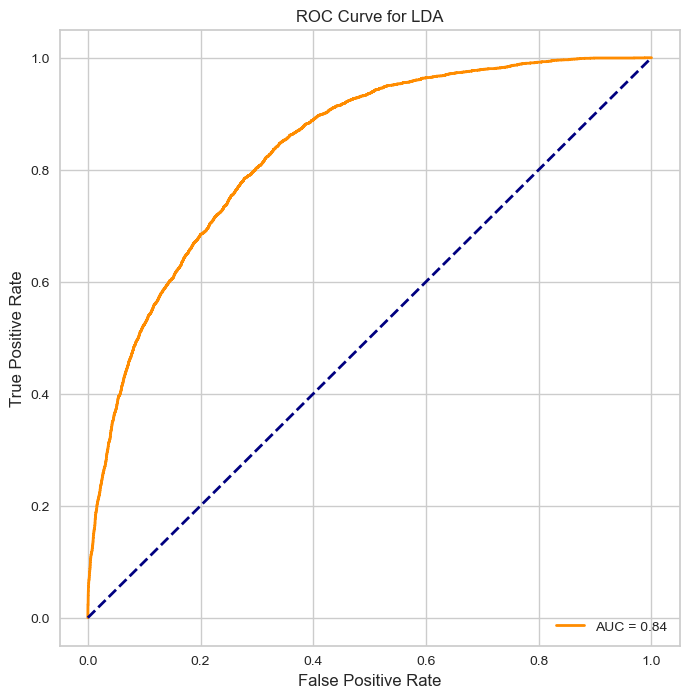

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, roc_auc_score, auc

# predictions 
y_prob_lda = lda.predict_proba(X1)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y1, y_prob_lda)

# AUC
roc_auc = auc(fpr, tpr)

#  ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA')
plt.legend(loc="lower right")
plt.show()